# Video processing

In [1]:
import torch
from PIL import Image
import torchvision.transforms
import os
import cv2
import matplotlib.pyplot as plt

data_dir = "H:/FAIR-Play/FAIR-Play/videos"
files = os.listdir(data_dir)
files_dir = [os.path.join(data_dir, i) for i in files]

Load video

In [2]:
vid = cv2.VideoCapture(files_dir[1])
print("Frame count: %d" % vid.get(cv2.CAP_PROP_FRAME_COUNT))
print("FPS %f" % vid.get(cv2.CAP_PROP_FPS))

Frame count: 561
FPS 59.940060


Current position: 561


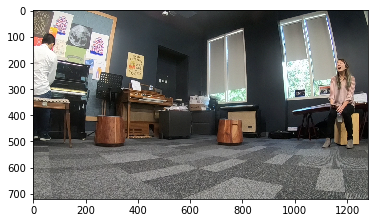

In [8]:
# Locate frame by millisecond
vid.set(cv2.CAP_PROP_POS_FRAMES, 560)
flag, frame = vid.read()
if flag:
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    print("Current position: %d" % vid.get(cv2.CAP_PROP_POS_FRAMES))
else:
    print("cap fail")

In [11]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
img = Image.fromarray(frame).convert('RGB')
img.show()

In [8]:
codec = int(vid.get(cv2.CAP_PROP_FOURCC))
print(codec)
print('codec is ' + chr(codec&0xFF) + chr((codec>>8)&0xFF) + chr((codec>>16)&0xFF) + chr((codec>>24)&0xFF))

828601953
codec is avc1


In [24]:
height = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
size = (width, height)
fps = vid.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'AVC1')
writer = cv2.VideoWriter('../seg.mp4', fourcc, fps, size)
vid.set(cv2.CAP_PROP_POS_FRAMES, 0)
for i range(10):
   success, frame = vid.read()
    if success:
        writer.write(frame)
    else:
        print("fail")
        break
writer.release()

SyntaxError: invalid syntax (<ipython-input-24-d375e94692c4>, line 8)

Current position: 301
Total frame: 10


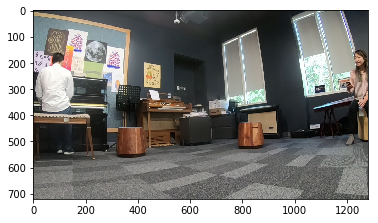

In [16]:
seg = cv2.VideoCapture("seg.mp4")
flag, frame = vid.read()
if flag:
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    print("Current position: %d" % vid.get(cv2.CAP_PROP_POS_FRAMES))
else:
    print("cap fail")
print("Total frame: %d" % seg.get(cv2.CAP_PROP_FRAME_COUNT))